# Un breve repaso por la herramienta en desarrollo.

Primero importamos la herramienta 
- Para simular primero se trabaja con el procesor generador Normal
- Se generan 2 mercados con el generador normal pero con diferente grado de entropía.


In [1]:
import garpar as gp

In [2]:
maker= gp.datasets.RissoNormal(random_state=42)

In [3]:
normalbe = maker.make_portfolio(days=100,entropy=0.1,window_size=5,price=100,stock_number=10)

In [4]:
normalae = maker.make_portfolio(days=100,entropy=0.9,window_size=5,price=100,stock_number=10)

In [5]:
normalme = maker.make_portfolio(days=100,entropy=0.43,window_size=5,price=100,stock_number=10)

<AxesSubplot:title={'center':'Price'}, xlabel='Days'>

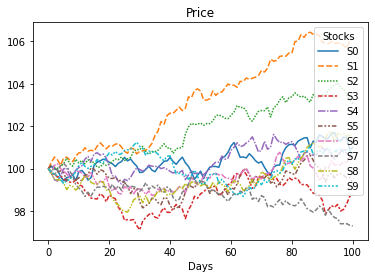

In [6]:
normalbe.plot()

<AxesSubplot:title={'center':'Price'}, xlabel='Days'>

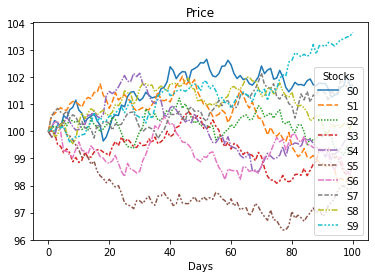

In [7]:
normalae.plot()

<AxesSubplot:title={'center':'Price'}, xlabel='Days'>

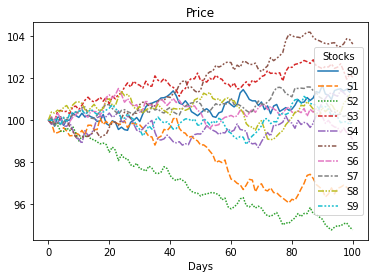

In [8]:
normalme.plot()

# Optimizamos los mercados simulados 
-Se crea el optimizador de Markowicz
-Se presentan los portfolios optimizados con el mismo retorno esperado para el portfolio.
- Se aprecian diferencias en los pesos

In [9]:
optimizador = gp.optimize.Markowitz()

In [10]:
portoptbe=optimizador.optimize(normalbe, 0.07)


In [11]:
portoptbe.weights

Stocks
S0    0.109255
S1    0.282163
S2    0.196552
S3    0.021676
S4    0.081837
S5    0.005890
S6    0.075493
S7    0.015510
S8    0.092057
S9    0.119568
Name: Weights, dtype: float64

In [12]:
portoptae=optimizador.optimize(normalae, 0.07)


In [13]:
portoptae.weights

Stocks
S0    0.107377
S1    0.000000
S2    0.000000
S3    0.000000
S4    0.000000
S5    0.000000
S6    0.000000
S7    0.261108
S8    0.061821
S9    0.569694
Name: Weights, dtype: float64

In [14]:
portoptme=optimizador.optimize(normalme, 0.07)
portoptme.weights

Stocks
S0    0.160866
S1    0.000000
S2    0.000000
S3    0.250246
S4    0.036430
S5    0.516145
S6    0.000000
S7    0.000000
S8    0.036313
S9    0.000000
Name: Weights, dtype: float64

## Si el inversionista pide más retornos 


In [15]:
portoptber = optimizador.optimize(normalbe, 0.14)


In [16]:
portoptber.weights

Stocks
S0    0.000000
S1    0.732978
S2    0.267022
S3    0.000000
S4    0.000000
S5    0.000000
S6    0.000000
S7    0.000000
S8    0.000000
S9    0.000000
Name: Weights, dtype: float64

In [17]:
portoptaem = optimizador.optimize(normalae, 0.50)


ValueError: target_return must be lower than the maximum possible return

# Cambiemos la distribución de los retornos 
-Ahora trabajemos con un proceso generador basado en una distribuciójn Levy Stable

In [ ]:
makerstable = gp.datasets.RissoLevyStable(n_jobs=8,random_state=42,alpha=1.6411,beta= -0.0126,mu=0.0005, sigma=0.005)

In [ ]:
stable_be = makerstable.make_portfolio(days=100, price= 100, window_size=5,stock_number=
                                            10,entropy=0.10)

In [ ]:
stable_be.plot()

In [ ]:
stable_ae = makerstable.make_portfolio(days=100, price= 100, window_size=5,stock_number=
                                            10,entropy=0.90)

In [ ]:
stable_ae.plot()

In [ ]:
portoptbes =optimizador.optimize(stable_be, 0.001)
portoptbes.weights

In [ ]:
portoptaes=optimizador.optimize(stable_ae, 0.001)
portoptaes.weights